In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
import random
import math

In [70]:
data = pd.read_csv('iris.data',header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
no_labeled_data = data.drop(4, axis=1)
no_labeled_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [195]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

In [197]:
k_means.n_iter_

4

In [73]:
k_means.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [74]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


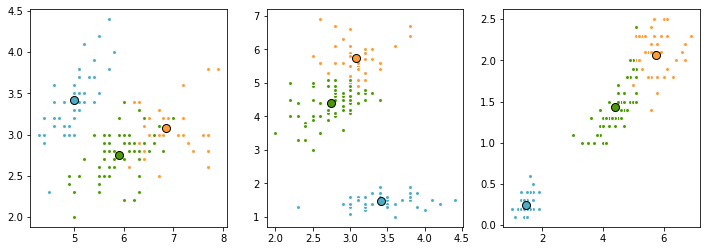

In [94]:
def plot_kmeans(k_means, data, title=''):
    f, ax = plt.subplots(1, 3, figsize=(12, 4))
    f.suptitle(title)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    print(ax)
    for i in range(3):
        my_members = k_means.labels_ == i
        cluster_center = k_means.cluster_centers_[i]
        for j in range(3):
            ax[j].plot(data[my_members][j], data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4, lw=0)
            ax[j].plot(cluster_center[j], cluster_center[j+1], 'o', markerfacecolor=colors[i], markeredgecolor='k', markersize=8)
    plt.show()
plot_kmeans(k_means, no_labeled_data)

In [78]:
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(no_labeled_data)

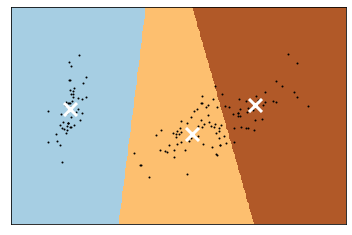

In [85]:
kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


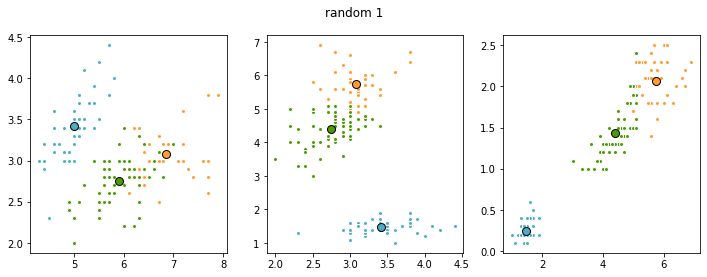

In [97]:
k_means = KMeans(init='random', n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, 'random 1')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


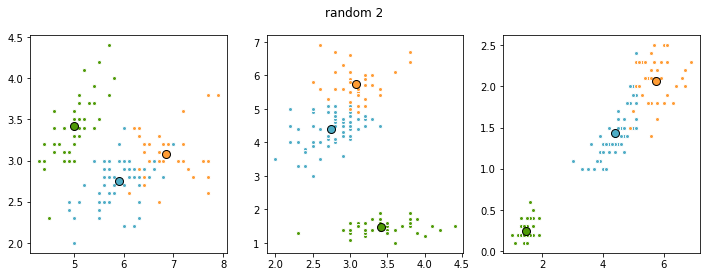

In [98]:
k_means = KMeans(init='random', n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, 'random 2')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


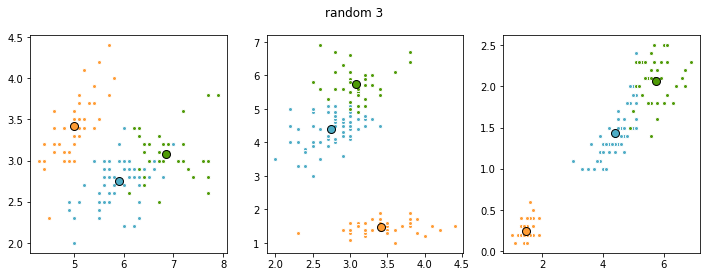

In [107]:
k_means = KMeans(init='random', n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, 'random 3')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


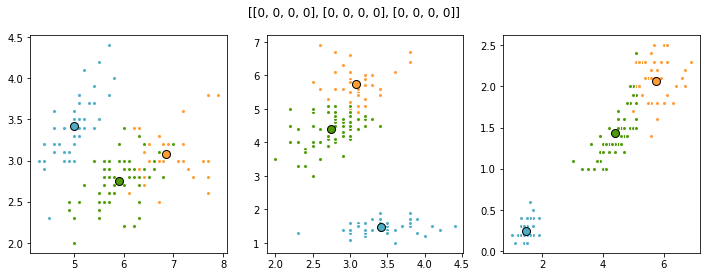

In [115]:
k_means = KMeans(init=np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, '[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


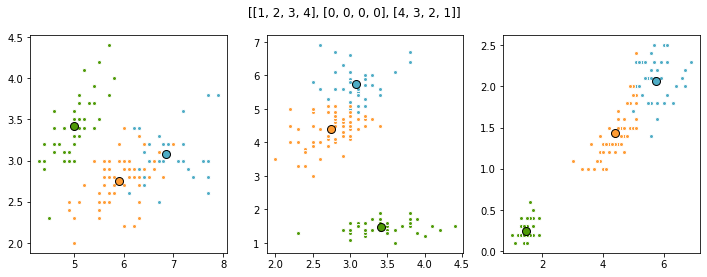

In [140]:
k_means = KMeans(init=np.array([[1, 2, 3, 4], [10, 10, 10, 10], [4, 3, 2, 1]]), n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, '[[1, 2, 3, 4], [10, 10, 10, 10], [4, 3, 2, 1]]')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


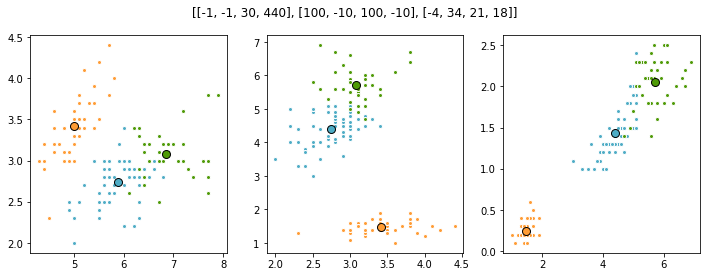

In [143]:
k_means = KMeans(init=np.array([[-1, -1, 30, 440], [100, -10, 100, -10], [-4, 34, 21, 18]]), n_clusters=3).fit(no_labeled_data)
plot_kmeans(k_means, no_labeled_data, '[[-1, -1, 30, 440], [100, -10, 100, -10], [-4, 34, 21, 18]]')

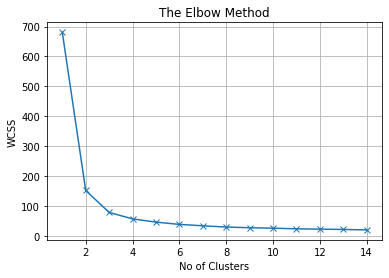

In [151]:
wcss=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15), wcss, marker='x')
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [171]:
batch_km = MiniBatchKMeans(n_clusters=3, batch_size=10, n_init=1)
batch_km.fit(no_labeled_data)

MiniBatchKMeans(batch_size=10, n_clusters=3, n_init=1)

In [172]:
km = KMeans(n_clusters=3, n_init=1)
km.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=1)

In [176]:
diff_labels = np.array([km_l != batch_km_l for km_l, batch_km_l in zip(km.labels_, batch_km.labels_)])
diff_labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

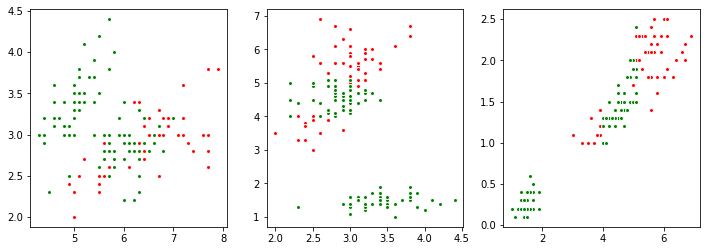

In [179]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
for j in range(3):
    ax[j].plot(no_labeled_data[diff_labels][j], no_labeled_data[diff_labels][j+1], 'w', markerfacecolor='r', marker='o', markersize=4, lw=0)
    ax[j].plot(no_labeled_data[~diff_labels][j], no_labeled_data[~diff_labels][j+1], 'w', markerfacecolor='g', marker='o', markersize=4, lw=0)
plt.show()

In [217]:
hier = AgglomerativeClustering(n_clusters=5, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_
hier_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 1, 4, 4, 1, 2, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 2, 4, 1, 1, 1,
       4, 2, 4, 1, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2], dtype=int64)

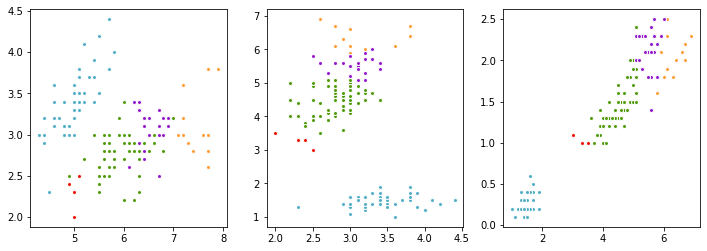

In [218]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#F00800', '#9215CB']
for i in range(5):
    my_members = hier_labels == i
    for j in range(3):
        ax[j].plot(no_labeled_data[my_members][j], no_labeled_data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4, lw=0)
plt.show()

In [220]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

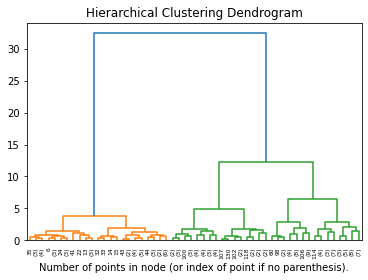

In [222]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(no_labeled_data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [231]:
data1 = np.zeros([250,2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)
    data2 = np.zeros([500,2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)
data = np.vstack((data1, data2))

In [241]:
hier = AgglomerativeClustering(n_clusters=2, linkage='single')
hier = hier.fit(data)
hier_labels = hier.labels_

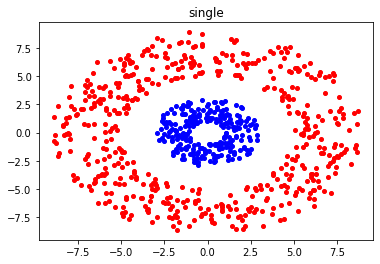

In [242]:
my_members = hier_labels == 0
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
my_members = hier_labels == 1
plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')
plt.title('single')
plt.show()